In [13]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np
import random as rand

TEST_SEED = 1234
rand.seed(TEST_SEED)

In [11]:
# n and p values
n, p = 5, 0.4

# a place to store the bonom distrubtions
x = np.arange(0, n+1)

In [48]:
binomial_pmf = binom.pmf(x, n, p)
print(binomial_pmf)

[0.07776 0.2592  0.3456  0.2304  0.0768  0.01024]


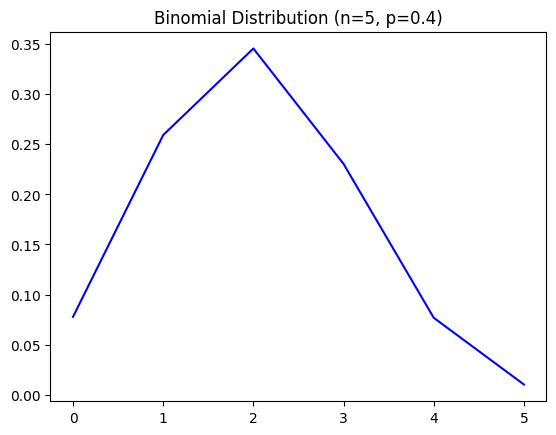

In [73]:
plt.plot(x, binomial_pmf, color='blue')
plt.title(f"Binomial Distribution (n={n}, p={p})")
plt.show()

In [70]:
# assign where this agent sits on the distubution
agent_1_binom_index = rand.randint(0, n-1)

# and a number that will decide the success of connection
agent_1_prob = rand.randint(0, 1000) / 1000

In [71]:
print(agent_1_prob)
print(agent_1_binom_index)

0.934
4


In [72]:
x[agent_1_binom_index] < agent_1_prob

False